### Logistic Regression Exercise

In [60]:
# import numpy
import numpy as np

import pandas as pd

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* print the shape of X

In [14]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [41]:
X1.shape

(150, 4)

* print y

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=42)

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [17]:
lg = linear_model.LogisticRegression()

In [18]:
lg.fit(X_train,y_train)

LogisticRegression()

In [23]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
y_pre = lg.predict(X_test)

In [21]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [ ]:
penalty = 'l1'

* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [ ]:
C = 1

* create a hyperparameter options dictionary

In [26]:
param_grid = [{'penalty':['l2'], 'C':[1, 10, 100, 1000],'solver':['newton-cg', 'sag', 'lbfgs']},{'penalty':['l1','l2'], 'C':[1, 10, 100, 1000],'solver':['liblinear']}]

* create a grid search using 5-fold cross validation

In [27]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=linear_model.LogisticRegression(), param_grid=param_grid, n_jobs=-1,cv=5)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)   

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'sag', 'lbfgs']},
                         {'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}])

In [29]:
clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [30]:
y_pred = clf.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



* fit the grid search

* take the best model from grid search

In [35]:
lg_best = linear_model.LogisticRegression(penalty='l2',solver='newton-cg',C=1)
lg_best.fit(X_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

* print the best hyperparameters

* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [36]:
y_proba = lg_best.predict_proba(X_test)

In [57]:
y_proba.shape

(30, 3)

In [33]:
y_proba[0]

array([0.01146683, 0.87431857, 0.1142146 ])

- plot the ROC curve and print the AUC

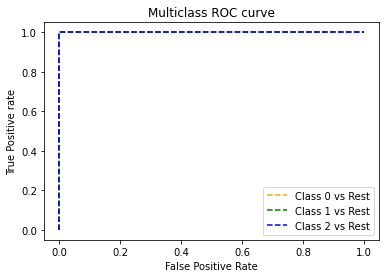

In [61]:
#y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr = {}
tpr = {}
thr = {}
for i in range(3):
    fpr[i], tpr[i], thr[i] = roc_curve(y_test,  y_proba[:,i],pos_label=i)
    

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [67]:
auc = roc_auc_score(y_test, y_proba,multi_class='ovr')

In [65]:
auc

1.0

* print the Logreg coeficients

In [38]:
lg_best.coef_

array([[-1.02054701,  1.13228684, -1.8171098 , -1.68689822],
       [ 0.53386708, -0.28263731, -0.34271257, -0.73094697],
       [ 0.48667993, -0.84964953,  2.15982237,  2.4178452 ]])

In [48]:
print("Model weights: %s"%(lg_best.coef_)) # these are weights
print("Model intercept: %s"%(lg_best.intercept_)) # this is the bias term
data = {'features': iris.feature_names, 'coefficients':lg_best.coef_[2]}
pd.DataFrame(data)

Model weights: [[-1.02054701  1.13228684 -1.8171098  -1.68689822]
 [ 0.53386708 -0.28263731 -0.34271257 -0.73094697]
 [ 0.48667993 -0.84964953  2.15982237  2.4178452 ]]
Model intercept: [-0.24836872  1.97379195 -1.72542324]


,features,coefficients
0,sepal length (cm),0.486680
1,sepal width (cm),-0.849650
2,petal length (cm),2.159822
3,petal width (cm),2.417845


* print the Logreg intercepts

In [46]:
lg_best.coef_

array([[-1.02054701,  1.13228684, -1.8171098 , -1.68689822],
       [ 0.53386708, -0.28263731, -0.34271257, -0.73094697],
       [ 0.48667993, -0.84964953,  2.15982237,  2.4178452 ]])

In [52]:
lg_best.

TypeError: 'NoneType' object is not callable